# Importando o dataset e tratando os dados

In [1]:
import pandas as pd

dados = pd.read_csv('data/Dados_totais.csv')
generos = pd.read_csv('data/data_by_genres.csv')
anos = pd.read_csv('data/data_by_year.csv')

In [2]:
dados = dados.drop(['explicit', 'key', 'mode'], axis = 1)

generos = generos.drop(['key', 'mode'], axis = 1)

anos = anos.drop(['key', 'mode'], axis = 1)

anos = anos[anos.year > 2000]

In [3]:
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [4]:
generos.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


In [5]:
anos.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125
81,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500
82,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407
83,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143
84,2005,0.255764,0.572281,237229.588205,0.653209,0.090194,0.190082,-7.466159,0.093334,121.617967,0.532531,50.953333


# Análise gráfica

In [12]:
import seaborn as sns
sns.set_style('darkgrid')

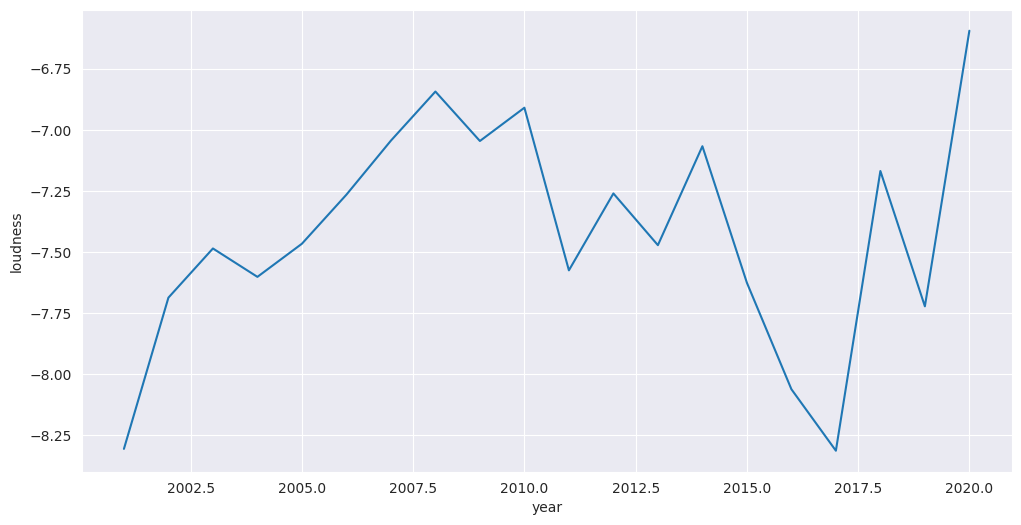

In [18]:
fig = sns.lineplot(x = 'year', y = 'loudness', data = anos)
fig.figure.set_size_inches(12, 6)

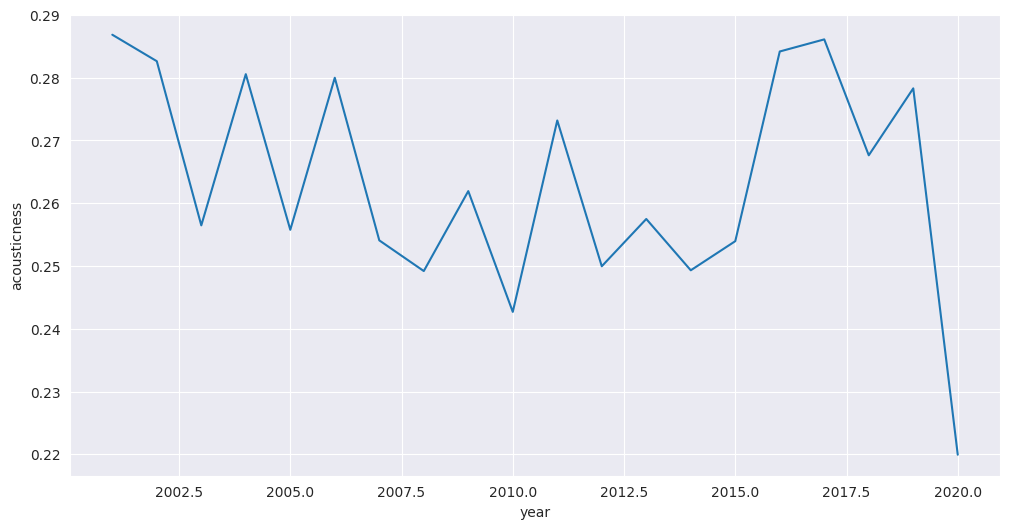

In [19]:
fig = sns.lineplot(x = 'year', y = 'acousticness', data = anos)
fig.figure.set_size_inches(12, 6)

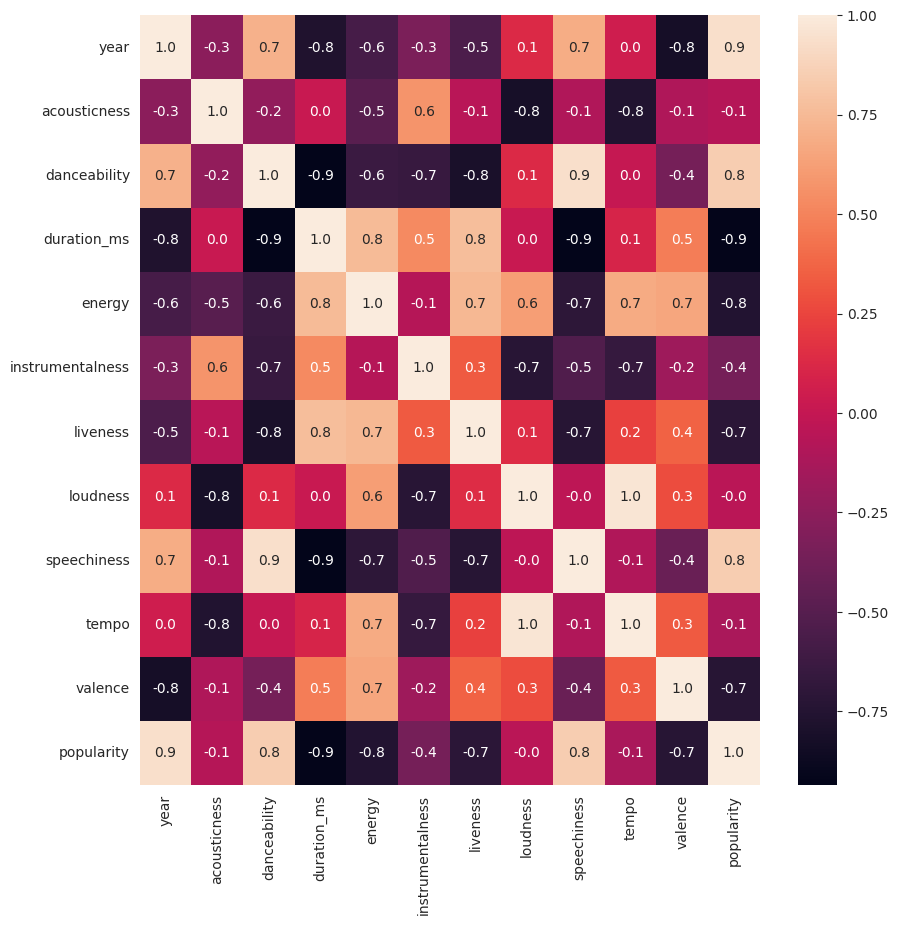

In [25]:
fig = sns.heatmap(anos.corr(), annot = True, fmt = '.1f')
fig.figure.set_size_inches(10, 10)

# Clusterização por gênero

## PCA e StandardScaler

In [30]:
generos1 = generos.drop(['genres'], axis = 1)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA